In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency  
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import scipy.stats as stats

In [63]:
# 确保系统中有中文字体，并设置为 SimHei
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决坐标轴负号显示问题

In [2]:
df_AR = pd.read_excel('dataset/三个量表.xlsx',sheet_name='ALSFRS-R评分量表')
df_tg_w = pd.read_csv('df_tg_w.csv')
df_tc_w = pd.read_csv('df_tc_w.csv')

df_w1 = pd.read_csv('dataset/问卷一总表.csv')

D:\asl\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [63]:
# 指标数据
df_ck = pd.read_csv('df_ck.csv')
# df_ALT = pd.read_csv('df_ALT.csv')
# df_AST = pd.read_csv('df_AST.csv')
# df_hdl = pd.read_csv('df_hdl.csv')
# df_LDH = pd.read_csv('df_LDH.csv')
# df_ldl = pd.read_csv('df_ldl.csv')
# df_tg = pd.read_csv('df_tg.csv')
# df_tc = pd.read_csv('df_tc.csv')
# df_UA = pd.read_csv('df_UA.csv')

# df_AR表操作

In [25]:
df_AR.sort_values(by=['患者编号', '评估日期'], inplace=True)
df_AR_copy = df_AR[['姓名','患者编号','评估日期','总分']].copy()
df_AR_copy

,姓名,患者编号,评估日期,总分
40352,尹佳,202009150002,2020-10-20,39
40353,尹佳,202009150002,2021-01-08,36
40351,尹佳,202009150002,2022-12-02,41
40350,金冬浩,202009170002,2020-11-20,28
40337,武杰,202009170003,2020-11-10,40
...,...,...,...,...
4,靳如霞,202405110008,2024-05-11,31
3,贾云峰,202405110011,2024-05-11,38
2,赵青生,202405120001,2024-05-12,33
1,肖玲,202405120004,2024-05-12,46


In [91]:
import numpy as np
import scipy.stats as stats

def Cochran_Armitage_test(observed_frequencies):
    '''
    趋势检验
    
    :param observed_frequencies: 
    :return: 
    '''
    # 将 DataFrame 中的列赋值给 counts 和 nobs
    counts = observed_frequencies['un'].values
    nobs = observed_frequencies['m'].values
    total = np.sum(nobs)
    
    # 计算比例
    p = counts / nobs
    print(p)
    # 计算 Cochran-Armitage 趋势检验的 Z 值
    x = np.arange(len(counts))
    weights = x / np.sum(x)  # 权重
    
    # 计算加权异常数和加权总数
    weighted_abnormal = np.sum(weights * counts)
    weighted_total = np.sum(weights * nobs)
    
    # 计算均值和方差
    mean = weighted_abnormal / weighted_total
    var = np.sum(weights ** 2 * (counts / nobs - mean) ** 2 * nobs) / np.sum(weights ** 2 * nobs)
    z_value = mean / np.sqrt(var)
    
    # 计算 p 值
    p_value = stats.norm.sf(z_value)
    
    print(f"Cochran-Armitage Trend Test Z-value: {z_value}")
    print(f"Cochran-Armitage Trend Test p-value: {p_value}")
    
    return p

In [81]:
import matplotlib.pyplot as plt

def plot(observed_frequencies, y, title):
    '''
    变化趋势可视化
    :param observed_frequencies: 包含数据的 DataFrame
    :param y: 要绘制的列数据
    :param title: 图表标题
    :return: 
    '''

    # 获取行索引（默认为 0, 1, 2, ...）
    x_values = observed_frequencies.index

    # 绘制折线图
    plt.figure(figsize=(15, 3))  # 修改图表大小
    plt.plot(x_values, y, marker='o', linestyle='-', color='#1f77b4', linewidth=2)  # 改进颜色和线宽

    # # 设置背景颜色
    # plt.gca().set_facecolor('#f2f2f2')  # 图表背景颜色
    # plt.gcf().patch.set_facecolor('#ffffff')  # 图表外部背景颜色

    # 添加具体数值标注
    for i, value in enumerate(y):
        plt.annotate(f'{value:.3f}',  # 显示到小数点后三位
                     (x_values[i], y[i]),  # 标注位置
                     textcoords="offset points",  # 标注文本的相对位置
                     xytext=(0, 10),  # 标注文本的偏移量
                     ha='center',
                     fontsize=10,  # 文本大小
                     color='black')  # 文本颜色

    # 添加标题和标签
    plt.title(title, fontsize=16, fontweight='bold')  # 图表标题样式
    plt.ylabel('比例', fontsize=14)

    # 显示网格线
    plt.grid(True, linestyle='--', alpha=0.5)  # 网格线样式

    # 显示图表
    plt.show()


In [26]:
# 根据总分划分病程阶段
def classify_disease_stage(score):
    if score >= 40:
        return '早期'
    else:
        if score >= 29:
            return '早中期'
        elif score >= 18:
            return '中晚期'
        else:
             return '晚期'


df_AR_copy['病程'] = df_AR_copy['总分'].apply(classify_disease_stage)
df_AR_copy

,姓名,患者编号,评估日期,总分,病程
40352,尹佳,202009150002,2020-10-20,39,早中期
40353,尹佳,202009150002,2021-01-08,36,早中期
40351,尹佳,202009150002,2022-12-02,41,早期
40350,金冬浩,202009170002,2020-11-20,28,中晚期
40337,武杰,202009170003,2020-11-10,40,早期
...,...,...,...,...,...
4,靳如霞,202405110008,2024-05-11,31,早中期
3,贾云峰,202405110011,2024-05-11,38,早中期
2,赵青生,202405120001,2024-05-12,33,早中期
1,肖玲,202405120004,2024-05-12,46,早期


# df_指标表操作

In [27]:
def find_nearest_date(row, TestIndicate='磷酸肌酸激酶（CK）', update_df=False, df_AR=df_AR_copy):  
    '''
    找出指标检测日期和AR评估日期最近的一行，并插入
    
    :param row: 包含检查日期、患者编号和临床意义的行数据
    :param TestIndicate: 指标名称，默认为'磷酸肌酸激酶（CK）'
    :param update_df: 是否更新df_AR，默认为False
    :return: None
    '''
    patient_id = row['患者编号']  
    test_date = pd.to_datetime(row['检查日期'])  # 确保输入时就是datetime类型  
    test_class = row[TestIndicate+'临床意义']
    
     
    if pd.isna(test_date):
        return None
    
     
    # 筛选出对应患者的评估日期  
    patient_rows = df_AR[df_AR['患者编号'] == patient_id]  
    if patient_rows.empty:  
        return None  # 如果没有找到对应的患者，返回None  
    
      
    # 计算每个评估日期与测试日期的差异  
    distances = (pd.to_datetime(patient_rows['评估日期']) - test_date).abs()
    # print(patient_id)
    # print(distances)
    
    
    # 找到最小差异的索引  
    min_idx = distances.idxmin()  
    
      
    # 获取对应的评估日期行  
    nearest_row_index = patient_rows.index.get_loc(min_idx)
    nearest_row = patient_rows.iloc[nearest_row_index]
    
      
    # 如果需要更新df_AR，则执行更新操作  
    if update_df:  
        # 确保要更新的列存在，如果不存在则创建新列
        check_date_col = TestIndicate + '检查日期'
        check_class_col = TestIndicate + '临床意义'
        check_distances = TestIndicate + '间隔日期'
        
        if check_date_col not in df_AR.columns:
            df_AR[check_date_col] = pd.NaT
        if check_class_col not in df_AR.columns:
            df_AR[check_class_col] = pd.NA
        if check_distances not in df_AR.columns:
            df_AR[check_distances] = pd.NA
    
        
        # 使用.loc进行更新
        df_AR.loc[nearest_row.name, check_date_col] = test_date  
        df_AR.loc[nearest_row.name, check_class_col] = test_class  
        df_AR.loc[nearest_row.name, check_distances] = distances[min_idx].days
        

In [29]:
for index, row in df_ck.iterrows(): 
    find_nearest_date(row,TestIndicate='磷酸肌酸激酶（CK）', update_df=True)
    
for index, row in df_ALT.iterrows(): 
    find_nearest_date(row,TestIndicate='谷丙转氨酶（ALT）',update_df=True)

for index, row in df_AST.iterrows(): 
    find_nearest_date(row,TestIndicate='谷草转氨酶（AST）',update_df=True)
    
for index, row in df_hdl.iterrows(): 
    find_nearest_date(row,TestIndicate='高密度脂蛋白胆固醇（HDL-C）',update_df=True)
    
for index, row in df_ldl.iterrows(): 
    find_nearest_date(row,TestIndicate='低密度脂蛋白胆固醇（LDL-C）',update_df=True)
    
for index, row in df_LDH.iterrows(): 
    find_nearest_date(row,TestIndicate='乳酸脱氢酶（LDH）',update_df=True)
    
for index, row in df_UA.iterrows(): 
    find_nearest_date(row,TestIndicate='尿酸（UA）',update_df=True)
    
for index, row in df_tg.iterrows(): 
    find_nearest_date(row,TestIndicate='甘油三酯 （TG）',update_df=True)
    
for index, row in df_tc.iterrows(): 
    find_nearest_date(row,TestIndicate='总胆固醇（TC）',update_df=True)

In [3]:
# df_AR_copy.to_csv('df_AR_indicate.csv', encoding='utf_8_sig')
df_AR_indicate = pd.read_csv('df_AR_indicate.csv')

In [4]:
df_AR_indicate

,Unnamed: 0,姓名,患者编号,评估日期,总分,病程,磷酸肌酸激酶（CK）检查日期,磷酸肌酸激酶（CK）临床意义,磷酸肌酸激酶（CK）间隔日期,谷丙转氨酶（ALT）检查日期,...,乳酸脱氢酶（LDH）间隔日期,尿酸（UA）检查日期,尿酸（UA）临床意义,尿酸（UA）间隔日期,甘油三酯 （TG）检查日期,甘油三酯 （TG）临床意义,甘油三酯 （TG）间隔日期,总胆固醇（TC）检查日期,总胆固醇（TC）临床意义,总胆固醇（TC）间隔日期
0,40352,尹佳,202009150002,2020-10-20,39,早中期,2019-02-15,女26.0-140.0,613.0,2018-06-24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40353,尹佳,202009150002,2021-01-08,36,早中期,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40351,尹佳,202009150002,2022-12-02,41,早期,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40350,金冬浩,202009170002,2020-11-20,28,中晚期,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40337,武杰,202009170003,2020-11-10,40,早期,2018-11-30,l_out,711.0,2017-12-09,...,711.0,2017-12-09,l_out,1067.0,2017-12-19,男1.7-2.2,1057.0,2017-12-19,男0.0-5.17,1057.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40349,4,靳如霞,202405110008,2024-05-11,31,早中期,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40350,3,贾云峰,202405110011,2024-05-11,38,早中期,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40351,2,赵青生,202405120001,2024-05-12,33,早中期,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40352,1,肖玲,202405120004,2024-05-12,46,早期,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
def disease_course(Testindicate='磷酸肌酸激酶（CK）', BOOL=True):
    '''
    
    :param Testindicate: 
    :return: 
    '''
    df_AR_indicate_copy = df_AR_indicate.copy()
    
    
    # 定义病程的类别顺序  
    categories = ['早期', '早中期', '中晚期','晚期']  
    # 将 '病程' 列转换为类别型，并指定顺序  
    df_AR_indicate_copy['病程'] = pd.Categorical(df_AR_indicate_copy['病程'], categories=categories, ordered=True)  
      
    # 现在可以安全地按 '病程' 列排序  
    df_AR_indicate_copy.sort_values(by='病程', inplace=True)  

    df_AR_indicate_copy.dropna(subset=Testindicate+'间隔日期',inplace=True)
    df_AR_indicate_copy = df_AR_indicate_copy[df_AR_indicate_copy[Testindicate+'间隔日期']<=370]
    # 统计不同病程下的“磷酸肌酸激酶（CK）临床意义”
    clinical_ck = df_AR_indicate_copy.groupby('病程')[Testindicate+'临床意义'].value_counts(normalize=BOOL).unstack()
    clinical_all = df_AR_indicate_copy['病程'].value_counts()
    # 显示结果
    # print(clinical_ck)
    # print(clinical_all)
    
    return clinical_ck

In [92]:
Testindicate = '磷酸肌酸激酶（CK）'
to_test = disease_course(Testindicate,BOOL=False)
to_test

C:\Users\徐文韬\AppData\Local\Temp\ipykernel_28828\1636552915.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clinical_ck = df_AR_indicate_copy.groupby('病程')[Testindicate+'临床意义'].value_counts(normalize=BOOL).unstack()


磷酸肌酸激酶（CK）临床意义,l_out,女0.0-26.0,女26.0-140.0,男0.0-38.0,男38.0-174.0
病程,,,,,
早期,350,1,79,1,101
早中期,262,4,69,8,65
中晚期,80,2,25,1,26
晚期,36,2,7,2,14


[0.65789474 0.64215686 0.59701493 0.59016393]
Cochran-Armitage Trend Test Z-value: 25.59545629494211
Cochran-Armitage Trend Test p-value: 8.570045067431109e-145


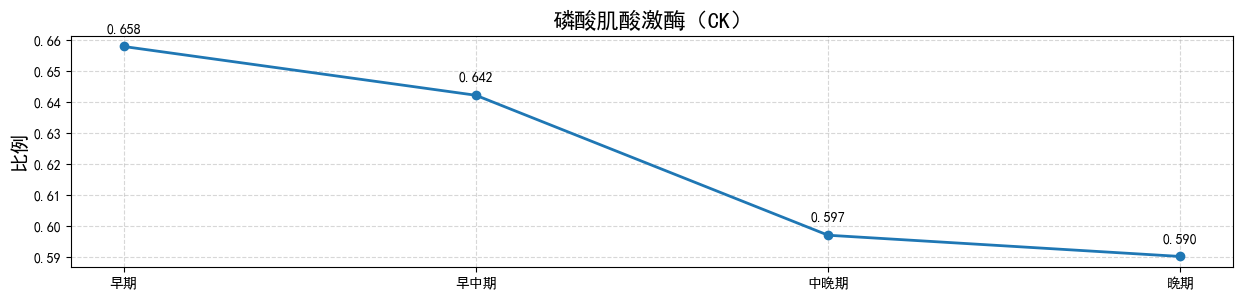

In [93]:
observed_frequencies = to_test.copy()
observed_frequencies.iloc[:, 1] = observed_frequencies.iloc[:, [0,1,2,3,4]].sum(axis=1)  
 
observed_frequencies=observed_frequencies.iloc[:,[0,1]]
observed_frequencies.columns = ['un', 'm']
observed_frequencies
X = Cochran_Armitage_test(observed_frequencies)
plot(observed_frequencies,X,Testindicate)

In [102]:
Testindicate='谷丙转氨酶（ALT）'
to_test = disease_course(Testindicate, BOOL=False)
to_test

C:\Users\徐文韬\AppData\Local\Temp\ipykernel_28828\1636552915.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clinical_ck = df_AR_indicate_copy.groupby('病程')[Testindicate+'临床意义'].value_counts(normalize=BOOL).unstack()


谷丙转氨酶（ALT）临床意义,l_out,女0.0-7.0,女7.0-35.0,男0.0-10.0,男10.0-40.0
病程,,,,,
早期,157,4,169,7,250
早中期,139,3,130,5,204
中晚期,58,2,45,2,72
晚期,26,3,14,3,34


[0.28620102 0.30561331 0.34636872 0.4       ]
Cochran-Armitage Trend Test Z-value: 8.348801848765707
Cochran-Armitage Trend Test p-value: 3.447945772358034e-17


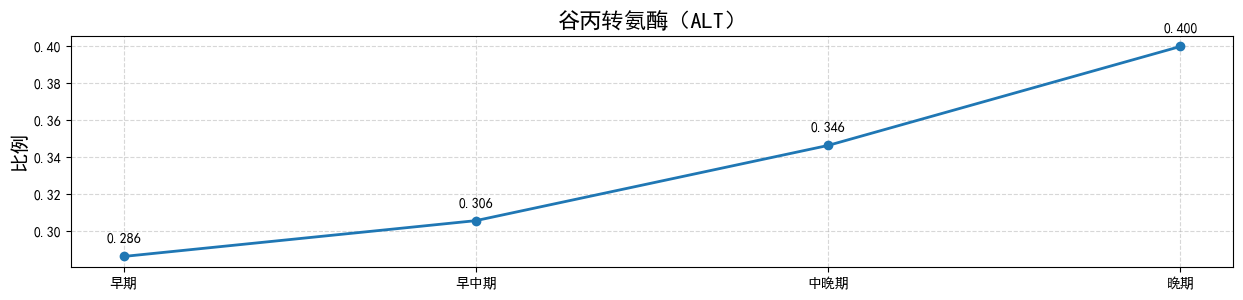

In [103]:
observed_frequencies = to_test.copy()
observed_frequencies.iloc[:, 0] = observed_frequencies.iloc[:, [0,1,3]].sum(axis=1)  
 
observed_frequencies.iloc[:, 1] = observed_frequencies.iloc[:, [0,2,4]].sum(axis=1)  
 
observed_frequencies=observed_frequencies.iloc[:,[0,1]]
observed_frequencies.columns = ['un', 'm']
observed_frequencies
X = Cochran_Armitage_test(observed_frequencies)
plot(observed_frequencies,X,Testindicate)



In [96]:
Testindicate='谷草转氨酶（AST）'
to_test = disease_course(Testindicate,BOOL=False)
to_test

C:\Users\徐文韬\AppData\Local\Temp\ipykernel_28828\1636552915.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clinical_ck = df_AR_indicate_copy.groupby('病程')[Testindicate+'临床意义'].value_counts(normalize=BOOL).unstack()


谷草转氨酶（AST）临床意义,l_out,女0.0-40.0,男0.0-40.0
病程,,,
早期,69,191,339
早中期,64,161,271
中晚期,36,53,91
晚期,7,22,49


[0.11519199 0.12903226 0.2        0.08974359]
Cochran-Armitage Trend Test Z-value: 2.99505299175917
Cochran-Armitage Trend Test p-value: 0.0013719858298559537


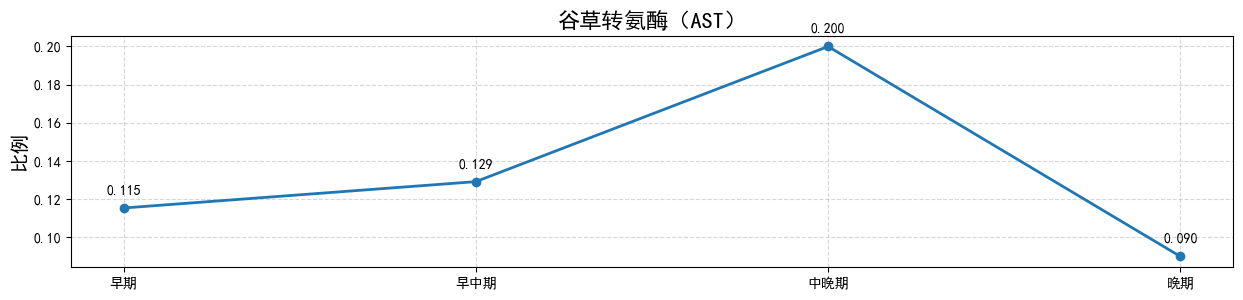

In [97]:
observed_frequencies = to_test.copy()
observed_frequencies.iloc[:, 1] = observed_frequencies.iloc[:, [0,1,2]].sum(axis=1)  
 
observed_frequencies=observed_frequencies.iloc[:,[0,1]]
observed_frequencies.columns = ['un', 'm']
observed_frequencies
X = Cochran_Armitage_test(observed_frequencies)
plot(observed_frequencies,X,Testindicate)

In [122]:
Testindicate = '高密度脂蛋白胆固醇（HDL-C）'
to_test = disease_course(Testindicate, BOOL=False)
to_test

C:\Users\徐文韬\AppData\Local\Temp\ipykernel_28828\1636552915.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clinical_ck = df_AR_indicate_copy.groupby('病程')[Testindicate+'临床意义'].value_counts(normalize=BOOL).unstack()


高密度脂蛋白胆固醇（HDL-C）临床意义,l_out,女0.0-1.3,女1.3-1.6,男0.0-1.0,男1.0-1.6
病程,,,,,
早期,66,87,38,115,186
早中期,60,61,42,104,128
中晚期,17,23,14,29,39
晚期,10,11,3,21,17


In [124]:
observed_frequencies = to_test.copy()
observed_frequencies.iloc[:, 4] = observed_frequencies.iloc[:, [0,1,2,3,4]].sum(axis=1)  
observed_frequencies.iloc[:, 0] = observed_frequencies.iloc[:, [1,3]].sum(axis=1)  
observed_frequencies.iloc[:, 1] = observed_frequencies.iloc[:, [4]].sum(axis=1) 
observed_frequencies

高密度脂蛋白胆固醇（HDL-C）临床意义,l_out,女0.0-1.3,女1.3-1.6,男0.0-1.0,男1.0-1.6
病程,,,,,
早期,202,492,38,115,492
早中期,165,395,42,104,395
中晚期,52,122,14,29,122
晚期,32,62,3,21,62


[0.41056911 0.41772152 0.42622951 0.51612903]
Cochran-Armitage Trend Test Z-value: 9.10777066667217
Cochran-Armitage Trend Test p-value: 4.204604589117063e-20


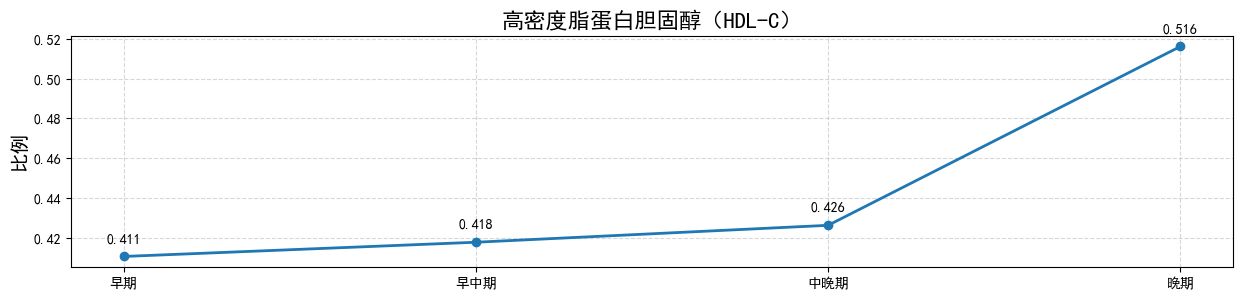

In [125]:

 
observed_frequencies=observed_frequencies.iloc[:,[0,1]]
observed_frequencies.columns = ['un', 'm']
observed_frequencies
X = Cochran_Armitage_test(observed_frequencies)
plot(observed_frequencies,X,Testindicate)

In [98]:
Testindicate = '低密度脂蛋白胆固醇（LDL-C）'
to_test = disease_course(Testindicate, BOOL=False)
to_test


C:\Users\徐文韬\AppData\Local\Temp\ipykernel_28828\1636552915.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clinical_ck = df_AR_indicate_copy.groupby('病程')[Testindicate+'临床意义'].value_counts(normalize=BOOL).unstack()


低密度脂蛋白胆固醇（LDL-C）临床意义,l_out,女0.0-129.0,女129.0-159.0,男0.0-129.0,男129.0-159.0
病程,,,,,
早期,48,110,44,192,87
早中期,48,92,43,136,69
中晚期,23,27,11,35,22
晚期,8,7,6,21,12


[0.37214137 0.41237113 0.47457627 0.48148148]
Cochran-Armitage Trend Test Z-value: 13.512317736618753
Cochran-Armitage Trend Test p-value: 6.614501552082658e-42


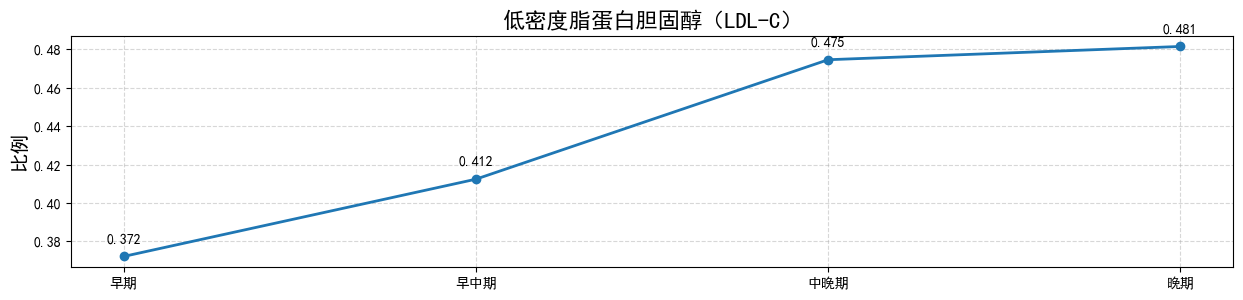

In [99]:
observed_frequencies = to_test.copy()
observed_frequencies.iloc[:, 0] = observed_frequencies.iloc[:, [0,2,4]].sum(axis=1)  
observed_frequencies.iloc[:, 1] = observed_frequencies.iloc[:, [0,1,3]].sum(axis=1)  

 
observed_frequencies=observed_frequencies.iloc[:,[0,1]]
observed_frequencies.columns = ['un', 'm']
observed_frequencies
X = Cochran_Armitage_test(observed_frequencies)
plot(observed_frequencies,X,Testindicate)

In [152]:
Testindicate = '乳酸脱氢酶（LDH）'
to_test = disease_course(Testindicate, BOOL=False)
to_test

C:\Users\徐文韬\AppData\Local\Temp\ipykernel_28828\1636552915.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clinical_ck = df_AR_indicate_copy.groupby('病程')[Testindicate+'临床意义'].value_counts(normalize=BOOL).unstack()


乳酸脱氢酶（LDH）临床意义,l_out,女0.0-110.0,女110.0-250.0,男0.0-120.0,男120.0-250.0
病程,,,,,
早期,54,3,144,9,236
早中期,36,4,102,8,185
中晚期,10,2,34,4,68
晚期,4,1,16,2,34


[0.14798206 0.14328358 0.13559322 0.12280702]
Cochran-Armitage Trend Test Z-value: 15.032420410473689
Cochran-Armitage Trend Test p-value: 2.2512439019780733e-51


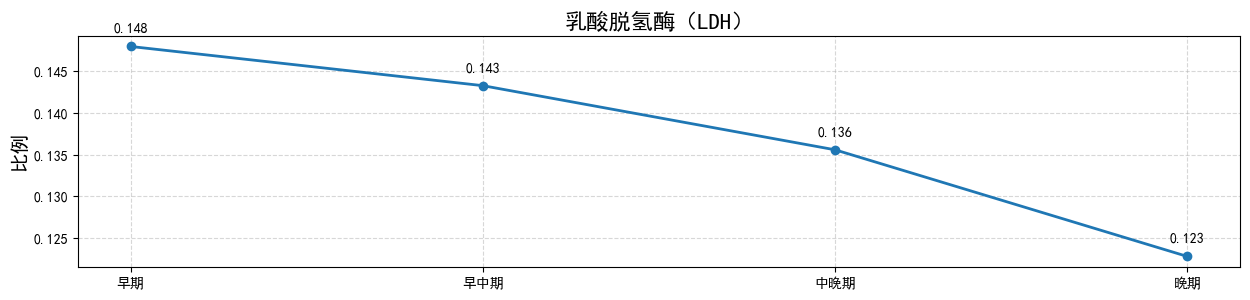

In [154]:
observed_frequencies = to_test.copy()
observed_frequencies.iloc[:, 0] = observed_frequencies.iloc[:, [0,1,3]].sum(axis=1)  
observed_frequencies.iloc[:, 1] = observed_frequencies.iloc[:, [0,2,4]].sum(axis=1)  

 
observed_frequencies=observed_frequencies.iloc[:,[0,1]]
observed_frequencies.columns = ['un', 'm']
observed_frequencies
X = Cochran_Armitage_test(observed_frequencies)
plot(observed_frequencies,X,Testindicate)

In [107]:
Testindicate = '尿酸（UA）'
to_test = disease_course(Testindicate, BOOL=False)
to_test

C:\Users\徐文韬\AppData\Local\Temp\ipykernel_28828\1636552915.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clinical_ck = df_AR_indicate_copy.groupby('病程')[Testindicate+'临床意义'].value_counts(normalize=BOOL).unstack()


尿酸（UA）临床意义,l_out,女0.0-0.089,女0.089-0.357,男0.0-0.15,男0.15-0.416
病程,,,,,
早期,182,0,136,0,227
早中期,128,2,124,2,198
中晚期,46,1,42,0,74
晚期,18,0,19,0,39


[0.33394495 0.2907489  0.28834356 0.23684211]
Cochran-Armitage Trend Test Z-value: 10.325877341003174
Cochran-Armitage Trend Test p-value: 2.6912232690669605e-25


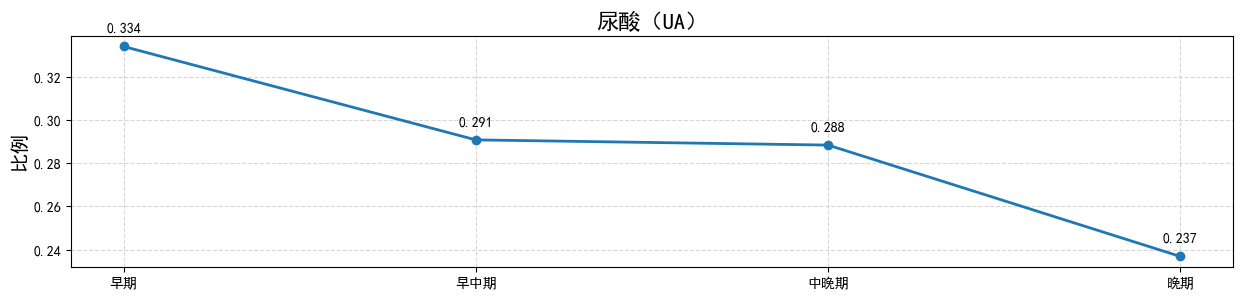

In [108]:
observed_frequencies = to_test.copy()
observed_frequencies.iloc[:, 0] = observed_frequencies.iloc[:, [0,1,3]].sum(axis=1)  
observed_frequencies.iloc[:, 1] = observed_frequencies.iloc[:, [0,2,4]].sum(axis=1)  

 
observed_frequencies=observed_frequencies.iloc[:,[0,1]]
observed_frequencies.columns = ['un', 'm']
observed_frequencies
X = Cochran_Armitage_test(observed_frequencies)
plot(observed_frequencies,X,Testindicate)

In [110]:
Testindicate='甘油三酯 （TG）'
to_test = disease_course(Testindicate, BOOL=False)
to_test


C:\Users\徐文韬\AppData\Local\Temp\ipykernel_28828\1636552915.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clinical_ck = df_AR_indicate_copy.groupby('病程')[Testindicate+'临床意义'].value_counts(normalize=BOOL).unstack()


甘油三酯 （TG）临床意义,l_out,女0.0-1.7,女1.7-2.2,男0.0-1.7,男1.7-2.2
病程,,,,,
早期,148,120,21,162,57
早中期,106,88,34,123,45
中晚期,46,27,9,36,16
晚期,21,10,5,15,9


[0.44488189 0.46717172 0.52985075 0.58333333]
Cochran-Armitage Trend Test Z-value: 10.176880870680378
Cochran-Armitage Trend Test p-value: 1.2574681153755496e-24


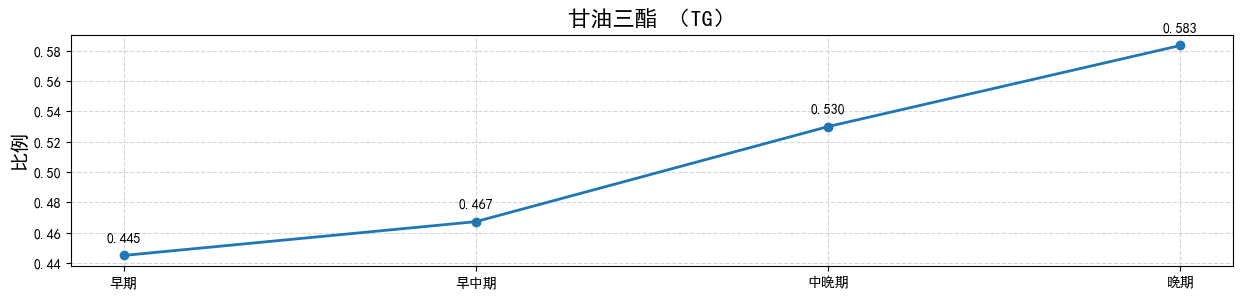

In [111]:
to_test
observed_frequencies = to_test.copy()
observed_frequencies.iloc[:, 0] = observed_frequencies.iloc[:, [0, 2, 4]].sum(axis=1)
observed_frequencies.iloc[:, 1] = observed_frequencies.iloc[:, [0, 1, 3]].sum(axis=1)

observed_frequencies = observed_frequencies.iloc[:, [0, 1]]
observed_frequencies.columns = ['un', 'm']
observed_frequencies
X = Cochran_Armitage_test(observed_frequencies)
plot(observed_frequencies, X, Testindicate)

In [112]:
Testindicate='总胆固醇（TC）'
to_test = disease_course(Testindicate, BOOL=False)
to_test

C:\Users\徐文韬\AppData\Local\Temp\ipykernel_28828\1636552915.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clinical_ck = df_AR_indicate_copy.groupby('病程')[Testindicate+'临床意义'].value_counts(normalize=BOOL).unstack()


总胆固醇（TC）临床意义,l_out,女0.0-5.17,女5.17-6.2,男0.0-5.17,男5.17-6.2
病程,,,,,
早期,54,94,58,188,88
早中期,55,80,47,138,70
中晚期,29,20,16,44,17
晚期,12,7,9,20,13


[0.41493776 0.44102564 0.49206349 0.55737705]
Cochran-Armitage Trend Test Z-value: 9.401580630219733
Cochran-Armitage Trend Test p-value: 2.6874729485064173e-21


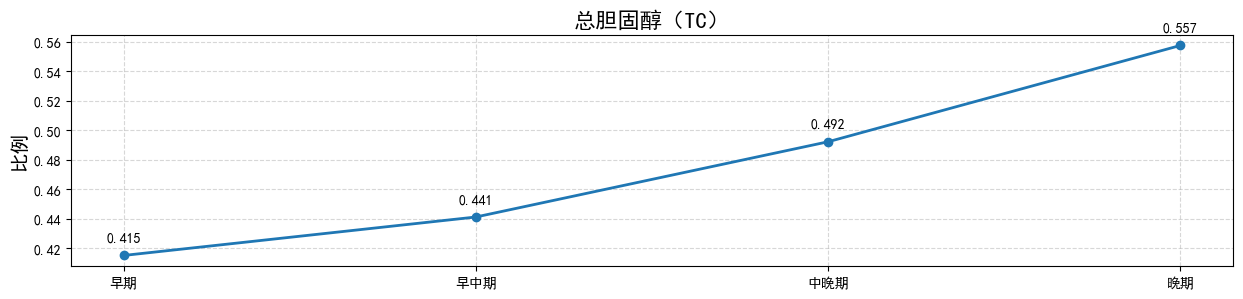

In [115]:
observed_frequencies = to_test.copy()
observed_frequencies.iloc[:, 0] = observed_frequencies.iloc[:, [0, 2, 4]].sum(axis=1)
observed_frequencies.iloc[:, 1] = observed_frequencies.iloc[:, [0, 1, 3]].sum(axis=1)

observed_frequencies = observed_frequencies.iloc[:, [0, 1]]
observed_frequencies.columns = ['un', 'm']
observed_frequencies
X = Cochran_Armitage_test(observed_frequencies)
plot(observed_frequencies, X, Testindicate)

In [36]:
df_AR_copy

,姓名,患者编号,评估日期,总分,病程,磷酸肌酸激酶（CK）检查日期,磷酸肌酸激酶（CK）临床意义,磷酸肌酸激酶（CK）间隔日期,谷丙转氨酶（ALT）检查日期,谷丙转氨酶（ALT）临床意义,...,乳酸脱氢酶（LDH）间隔日期,尿酸（UA）检查日期,尿酸（UA）临床意义,尿酸（UA）间隔日期,甘油三酯 （TG）检查日期,甘油三酯 （TG）临床意义,甘油三酯 （TG）间隔日期,总胆固醇（TC）检查日期,总胆固醇（TC）临床意义,总胆固醇（TC）间隔日期
40352,尹佳,202009150002,2020-10-20,39,早中期,2019-02-15,女26.0-140.0,613,2018-06-24,女7.0-35.0,...,<NA>,NaT,<NA>,<NA>,NaT,<NA>,<NA>,NaT,<NA>,<NA>
40353,尹佳,202009150002,2021-01-08,36,早中期,NaT,<NA>,<NA>,NaT,<NA>,...,<NA>,NaT,<NA>,<NA>,NaT,<NA>,<NA>,NaT,<NA>,<NA>
40351,尹佳,202009150002,2022-12-02,41,早期,NaT,<NA>,<NA>,NaT,<NA>,...,<NA>,NaT,<NA>,<NA>,NaT,<NA>,<NA>,NaT,<NA>,<NA>
40350,金冬浩,202009170002,2020-11-20,28,中晚期,NaT,<NA>,<NA>,NaT,<NA>,...,<NA>,NaT,<NA>,<NA>,NaT,<NA>,<NA>,NaT,<NA>,<NA>
40337,武杰,202009170003,2020-11-10,40,早期,2018-11-30,l_out,711,2017-12-09,男10.0-40.0,...,711,2017-12-09,l_out,1067,2017-12-19,男1.7-2.2,1057,2017-12-19,男0.0-5.17,1057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,靳如霞,202405110008,2024-05-11,31,早中期,NaT,<NA>,<NA>,NaT,<NA>,...,<NA>,NaT,<NA>,<NA>,NaT,<NA>,<NA>,NaT,<NA>,<NA>
3,贾云峰,202405110011,2024-05-11,38,早中期,NaT,<NA>,<NA>,NaT,<NA>,...,<NA>,NaT,<NA>,<NA>,NaT,<NA>,<NA>,NaT,<NA>,<NA>
2,赵青生,202405120001,2024-05-12,33,早中期,NaT,<NA>,<NA>,NaT,<NA>,...,<NA>,NaT,<NA>,<NA>,NaT,<NA>,<NA>,NaT,<NA>,<NA>
1,肖玲,202405120004,2024-05-12,46,早期,NaT,<NA>,<NA>,NaT,<NA>,...,<NA>,NaT,<NA>,<NA>,NaT,<NA>,<NA>,NaT,<NA>,<NA>


In [51]:
# df_w = pd.merge(df_tg_w,df_tc_w,how="outer",on=['患者编号','检查日期','最早时间','最晚时间','最早总分','最晚总分','Aspirin','天数差','月份差','总分差','AR_K_day','AR_K_Mon','性别','姓名'])
# unique_patient_ids = df_w.drop_duplicates(subset='患者编号')['患者编号'].tolist()
# # 假设 list 是包含唯一患者编号的列表，df_ar 是另一个 DataFrame
# filtered_df = df_AR[df_AR['患者编号'].isin(unique_patient_ids)][['患者编号','评估日期','总分']]
# df_w1 = pd.read_csv('dataset/问卷一总表.csv')
def filter_dict(d):  
    # 检查字典是否为空且长度大于20  
    if not d or len(d) <= 3:  
        return False  
        
    else:
        return True
    # # 遍历字典，检查是否有任何键对应的值（作为字符串）大于'2024-05-20'  
    # for keys in d.keys():  
    #     if isinstance(keys, str) and keys > '2024-03-01':  
    #         return True  
    # return False  

# # 应用筛选函数  
# filtered_df = df_AR_ex[df_AR_ex['AR提交记录'].apply(filter_dict)]  
# filtered_df  
# df_AR_no_duplicates = df_AR[['患者编号','姓名']].drop_duplicates(subset='患者编号', keep='first') 
# filtered_df_merge = pd.merge(df_AR_no_duplicates,filtered_df,how='right',on='患者编号')
# filtered_df_merge
# # 使用isin()函数来检查filtered_df_merge中的姓名是否不在df2的姓名中  
# # 注意：isin()返回的是一个布尔序列，表示每个元素是否在给定序列中  
# not_in_dfw1 = ~filtered_df_merge['姓名'].isin(df_w1['患者姓名'])  
# 
# # 使用这个布尔序列来筛选filtered_df_merge  
# filtered_df_merge_not_in_dfw1 = filtered_df_merge[not_in_dfw1]  
# 
# # # 如果你只需要姓名列，可以选择它  
# # names_only = filtered_df_merge_not_in_df2['姓名']  
# #   
# # # 显示结果  
# # print(names_only)
# filtered_df_merge_not_in_dfw1
# df_information = pd.read_excel('dataset\患者基本信息.xlsx')
# df_ex_pho = pd.merge(df_information[['患者编号','紧急联系人手机号']],filtered_df_merge_not_in_dfw1,how='inner',on='患者编号')
# df_ex_pho
# df_ex_pho.to_csv('提交AR超过一年的患者.csv',encoding='utf_8_sig')

临时任务

In [151]:
# df_100 = pd.read_csv('提交AR超过一年的患者.csv')
# df_city = pd.read_excel('dataset/三个量表.xlsx')
# df_start = pd.read_excel('dataset/发病情况.xlsx',sheet_name='首次发病及诊断情况')[['患者编号','发病日期','确诊日期']]
# df_city=df_city[['患者编号','所在城市']]
# df_100 = pd.merge(df_100,df_city,how='left',on='患者编号')
# df_100
# df_100 = pd.merge(df_100,df_start, how='left', on='患者编号')
# df_100
# df_100 = df_100.dropna(subset=['发病日期','确诊日期'])
# df_100[['发病日期','确诊日期']] = pd.to_datetime(df_100[['发病日期','确诊日期']])
# df_100 = df_100.drop(columns='姓名')
# # df_100.to_csv('患者信息.csv',encoding='utf_8_sig')
# df_100

In [76]:

  
# # 进行卡方检验  
# chi2, p, dof, expected = chi2_contingency(observed_frequencies)  
#   
# print(f"Chi-squared: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")  
#   
# # 如果p值小于显著性水平（如0.05），则拒绝零假设，认为不同疾病阶段的异常比例有显著差异  
# if p < 0.05:  
#     print("There is a statistically significant difference in the proportion of abnormalities between the disease stages.")  
# else:  
#     print("There is no statistically significant difference in the proportion of abnormalities between the disease stages.")  
#   
# # 也可以查看期望频数  
# print("Expected frequencies:")  
# print(expected)

In [75]:
# df_ck = df_ck[['患者编号','姓名','检查日期','磷酸肌酸激酶（CK）']]
# df_ck.sort_values(by=['患者编号', '检查日期'], inplace=True)
# 
# # 定义将日期转换为字典的函数
# def date_dict(group):
#     return group.groupby('检查日期')['磷酸肌酸激酶（CK）'].apply(list).to_dict()
# 
# # 计算每个患者的日期字典
# date_dicts = df_ck.groupby('患者编号').apply(date_dict).reset_index(name='ck提交记录')
# 
# # 合并原表和日期字典 DataFrame
# df_merged = df_ck.merge(date_dicts, on='患者编号')
# 
# df_merged = df_merged[['患者编号','姓名','ck提交记录']]
# df_merged = df_merged.drop_duplicates(subset='患者编号')
# df_merged = df_merged[df_merged['ck提交记录'].apply(filter_dict)]  
# df_merged.to_csv('ck提交超过三次.csv',encoding='utf_8_sig')

In [ ]:
import pandas as pd



# 定义函数，将每个患者的检查数据展平成每行一个患者
def reshape_patient_data(df):
    # 对患者进行分组，并将每组转换为一个 DataFrame
    grouped = df.groupby('患者编号').apply(lambda x: x.sort_values('检查日期')).reset_index(drop=True)

    # 获取每个患者的检查次数
    num_checks = grouped.groupby('患者编号').size().max()

    # 创建一个列表，用于存储每个患者的数据
    reshaped_data = []

    for patient, group in grouped.groupby('患者编号'):
        # 创建一个字典，每个键是 '检查_次数' 的形式
        patient_data = {'患者编号': patient}
        for i, (date, ck) in enumerate(zip(group['检查日期'], group['磷酸肌酸激酶（CK）']), start=1):
            patient_data[f'检查日期_{i}'] = date
            patient_data[f'CK_{i}'] = ck
        reshaped_data.append(patient_data)

    # 将列表转换为 DataFrame
    reshaped_df = pd.DataFrame(reshaped_data)

    return reshaped_df

# 调用函数并获取结果
df_reshaped = reshape_patient_data(df_ck)

# 保存为 CSV 文件
df_reshaped.to_csv('ck提交超过三次.csv', encoding='utf_8_sig', index=False)

print(df_reshaped)

In [87]:
# df_reshaped = df_reshaped.dropna(subset='检查日期_4')
# df_reshaped = df_reshaped.drop_duplicates(subset='患者编号')
# 
# df_reshaped.to_csv('ck提交超过三次.csv',encoding='utf_8_sig')
# df_reshaped = pd.merge(df_reshaped,df_ck[['患者编号','姓名']],how="inner", on='患者编号')
# df_reshaped
# # 获取所有列名
# columns = df_reshaped.columns.tolist()
# 
# # 将 '姓名' 列移到第二列的位置
# # 从列表中删除 '姓名' 列，然后将其插入到第二列的位置
# columns.remove('姓名')
# columns.insert(1, '姓名')
# 
# # 重新排序 DataFrame 列
# df_merged = df_reshaped[columns]
# df_merged = df_merged.drop_duplicates(subset='患者编号')
# df_merged.to_csv('ck提交超过三次.csv',encoding='utf_8_sig')